<a href="https://colab.research.google.com/github/duanasq/learning-ds-public/blob/main/Displaying_pytorch_dataset_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I just wanted to display a sample image from the [CIFAR](https://www.cs.toronto.edu/~kriz/cifar.html) dataset that comes bundled in torchvision. I got it working, but it was not easy. 

I'll show you the working code first. Then I'll give you the explanation.

In [1]:
import numpy as np
import torch
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# Download the dataset and transform images to tensors
cifar_ds = datasets.CIFAR10(
    root='./data', train=True,
    download=True,
    transform=transforms.ToTensor()
)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


In [3]:
# define a function that first transposes the image, then displays it
# src: https://github.com/pytorch/tutorials/blob/master/beginner_source/blitz/cifar10_tutorial.py
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

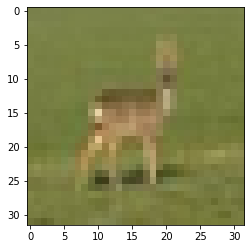

In [4]:
# choose a random index and retrieve a sample, then display it with our custom function
sample_idx = torch.randint(len(cifar_ds), size=(1,)).item()
img, label = cifar_ds[sample_idx]

imshow(img)


Alright time for some explanation. Let's re-retrieve the CIFAR dataset but let's not apply the ToTensor() transform so you can see what type the images are by default. They are [PIL or Pillow Images](https://pillow.readthedocs.io/en/stable/reference/Image.html). Matplotlib uses the Pillow library, so it can display PIL images.

Files already downloaded and verified
<class 'PIL.Image.Image'>


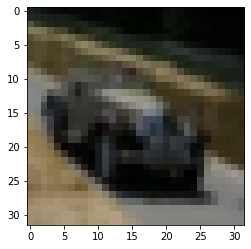

In [5]:
cifar_ds = datasets.CIFAR10(
    root='./data', train=True,
    download=True,
    # transform=transforms.ToTensor()
)

sample_idx = torch.randint(len(cifar_ds), size=(1,)).item()
img, label = cifar_ds[sample_idx]
print(type(img))
plt.imshow(img)

Let's re-retrieve the dataset applying the ToTensor() transform again, but now look at the shape of the tensors. It's not what I expected.

In [6]:
cifar_ds = datasets.CIFAR10(
    root='./data', train=True,
    download=True,
    transform=transforms.ToTensor()
)

sample_idx = torch.randint(len(cifar_ds), size=(1,)).item()
img, label = cifar_ds[sample_idx]
print(type(img))
print(img.shape)
print(img)

Files already downloaded and verified
<class 'torch.Tensor'>
torch.Size([3, 32, 32])
tensor([[[0.8745, 0.8549, 0.7961,  ..., 0.8392, 0.8471, 0.8471],
         [0.8118, 0.7961, 0.7451,  ..., 0.8314, 0.8431, 0.8353],
         [0.7373, 0.7216, 0.6941,  ..., 0.8353, 0.8510, 0.8353],
         ...,
         [0.5765, 0.5843, 0.6039,  ..., 0.6196, 0.6275, 0.6392],
         [0.5608, 0.5725, 0.5882,  ..., 0.5765, 0.5804, 0.5882],
         [0.5294, 0.5451, 0.5569,  ..., 0.6392, 0.6431, 0.6510]],

        [[0.8627, 0.8431, 0.7882,  ..., 0.8039, 0.8196, 0.8196],
         [0.8039, 0.7882, 0.7373,  ..., 0.7961, 0.8157, 0.8078],
         [0.7294, 0.7137, 0.6863,  ..., 0.8039, 0.8196, 0.8078],
         ...,
         [0.5765, 0.5804, 0.5882,  ..., 0.6157, 0.6118, 0.6196],
         [0.5608, 0.5686, 0.5725,  ..., 0.5725, 0.5647, 0.5686],
         [0.5294, 0.5412, 0.5412,  ..., 0.6392, 0.6275, 0.6275]],

        [[0.8235, 0.8039, 0.7451,  ..., 0.7765, 0.7882, 0.7882],
         [0.7529, 0.7373, 0.6863,  ...

The shape of the tensor is [3, 32, 32]. CIFAR images are 32x32 RGB images, so I was expecting the shape of the tensor to be [32, 32, 3]. I don't know why it isn't, but it matlabplot can't display it like that. For an RGB image, matlabplot expects the 3rd dimension to be the RGB values. So that's why we have to define the custom `imshow` function which does the transpose of the tensor.




TypeError: ignored

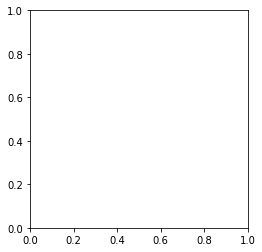

In [7]:
# this will error
plt.imshow(img)

Now let's look at the code for displaying an image from the mnist dataset, which is an example given in the [pytorch dataset tutorial](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html).

In [8]:
mnist_ds = datasets.FashionMNIST(
    root="./data",
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [9]:
sample_idx_mnist = torch.randint(len(mnist_ds), size=(1,)).item()
img_mnist, label_mnist = mnist_ds[sample_idx_mnist]
print(img_mnist.shape)


torch.Size([1, 28, 28])


Notice that the mnist image has 1 instead of 3 in the first dimension. This is because the mnist images are black-and-white. 

In order to display them, the pytorch tutorial does a .squeeze(). What is this? The squeeze() function on a tensor gets rid of any dimensions which are just 1, so you can think of it as removing a useless dimension.

The img.squeeze() on the mnist image removes that useless outer dimension, and it becomes a 2D image, which matplotlib will happily plot.

torch.Size([28, 28])


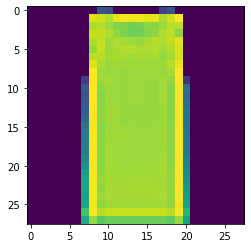

In [10]:
print(img_mnist.squeeze().shape)
plt.imshow(img_mnist.squeeze())

But hang on.. you said mnist images were black-and-white and this is only a 2D tensor now... so where is the colour coming from?? Well it turns out that matplotlib will [apply a pseudocolour to your grayscale image](https://matplotlib.org/stable/tutorials/introductory/images.html#applying-pseudocolor-schemes-to-image-plots). Bizarre, but cool I guess. 

If you really want grayscale, you have to specify that.

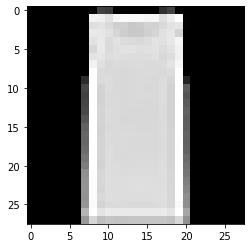

In [11]:
plt.imshow(img_mnist.squeeze(), cmap="gray")

Finally, if you want to see what plotting a normal png image looks like, which is covered in the [matplotlib image tutorial](https://matplotlib.org/stable/tutorials/introductory/images.html), it won't take long, stick around!

In [12]:
# we download the sample image
!wget https://raw.githubusercontent.com/matplotlib/matplotlib/main/doc/_static/stinkbug.png

--2023-01-21 20:05:30--  https://raw.githubusercontent.com/matplotlib/matplotlib/main/doc/_static/stinkbug.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 108161 (106K) [image/png]
Saving to: ‘stinkbug.png’

stinkbug.png        100%[===================>] 105.63K  --.-KB/s    in 0.02s   

2023-01-21 20:05:30 (4.68 MB/s) - ‘stinkbug.png’ saved [108161/108161]



In [16]:
# now we load it in - let's look at the shape. also, notice that it's an numpy array, not a PIL image! 
bug_img = mpimg.imread('stinkbug.png')
print(bug_img.shape)
print(type(bug_img))
# show the first two elements
bug_img[0:2]

(375, 500, 3)
<class 'numpy.ndarray'>


array([[[0.40784314, 0.40784314, 0.40784314],
        [0.40784314, 0.40784314, 0.40784314],
        [0.40784314, 0.40784314, 0.40784314],
        ...,
        [0.42745098, 0.42745098, 0.42745098],
        [0.42745098, 0.42745098, 0.42745098],
        [0.42745098, 0.42745098, 0.42745098]],

       [[0.4117647 , 0.4117647 , 0.4117647 ],
        [0.4117647 , 0.4117647 , 0.4117647 ],
        [0.4117647 , 0.4117647 , 0.4117647 ],
        ...,
        [0.42745098, 0.42745098, 0.42745098],
        [0.42745098, 0.42745098, 0.42745098],
        [0.42745098, 0.42745098, 0.42745098]]], dtype=float32)

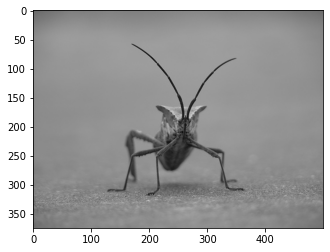

In [15]:
plt.imshow(bug_img)

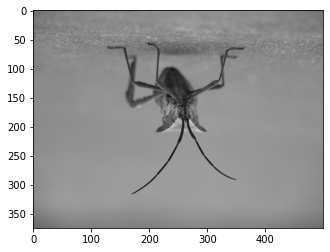

In [28]:
# we can flip the image upside down like this. the -1 in the ::-1 slice operator is "-1 step". It will reverse the first dimension, which for png numpy array seems to be the rows.
bug2 = bug_img[::-1,:,:]
plt.imshow(bug2)

Feel free to do the full tutorials yourself!
- [Matlab image tutorial ](https://matplotlib.org/stable/tutorials/introductory/images.html)
- [Pytorch dataset tutorial](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)

Happy ML adventures!